Libraries

In [78]:
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 

Data pre-processing

In [79]:
df = pd.read_csv(r'C:\Users\krr_i\Downloads\archive (5)\Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023.csv')
df

,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1569.0,1647.0,NaN
1,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5804.0,6029.0,NaN
2,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,15080.0,15699.0,NaN
3,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37414.0,38878.0,NaN
4,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,82668.0,85708.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
620995,5/1/2023,5/31/2023,By Month,2023.0,5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,67.0,67.0,NaN
620996,6/1/2023,6/30/2023,By Month,2023.0,6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,122.0,122.0,NaN
620997,7/1/2023,7/31/2023,By Month,2023.0,7.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,114.0,114.0,NaN
620998,8/1/2023,8/31/2023,By Month,2023.0,8.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,78.0,78.0,NaN


In [80]:
# Basic structure and summary
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621000 entries, 0 to 620999
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Start Date          621000 non-null  object 
 1   End Date            621000 non-null  object 
 2   Group               621000 non-null  object 
 3   Year                608580 non-null  float64
 4   Month               558900 non-null  float64
 5   State               621000 non-null  object 
 6   Condition Group     621000 non-null  object 
 7   Condition           621000 non-null  object 
 8   ICD10_codes         621000 non-null  object 
 9   Age Group           621000 non-null  object 
 10  COVID-19 Deaths     437551 non-null  float64
 11  Number of Mentions  443423 non-null  float64
 12  Flag                183449 non-null  object 
dtypes: float64(4), object(9)
memory usage: 61.6+ MB
None
                Year          Month  COVID-19 Deaths  Number of Mentions
count  6

In [81]:
# Handling missing values (example: filling NaN in 'Year' and 'Month' with a placeholder)
df['Year'].fillna('Unknown', inplace=True)
df['Month'].fillna('Unknown', inplace=True)

# Convert 'Start Date' and 'End Date' to datetime
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])

COVID-19 DEATHS BY AGE GROUP

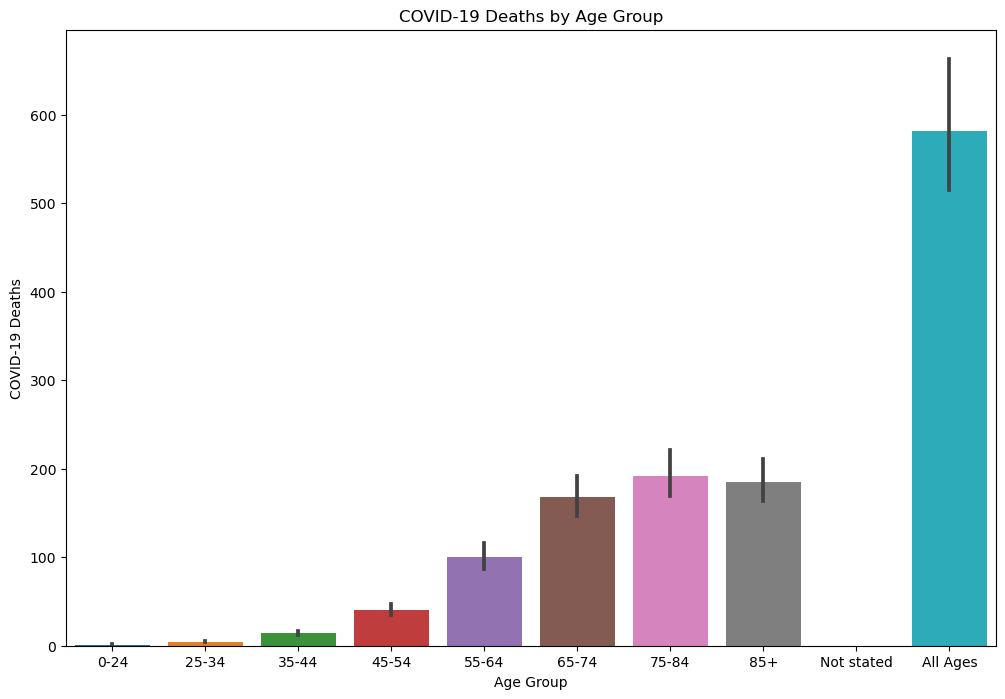

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of COVID-19 deaths by age group
plt.figure(figsize=(12, 8))
sns.barplot(x='Age Group', y='COVID-19 Deaths', data=df)
plt.title('COVID-19 Deaths by Age Group')
plt.show()

# Trends over time (assuming 'Start Date' and 'End Date' are the same for each row)
df['Year'] = df['Start Date'].dt.year
df_grouped = df.groupby('Year')['COVID-19 Deaths'].sum().reset_index()



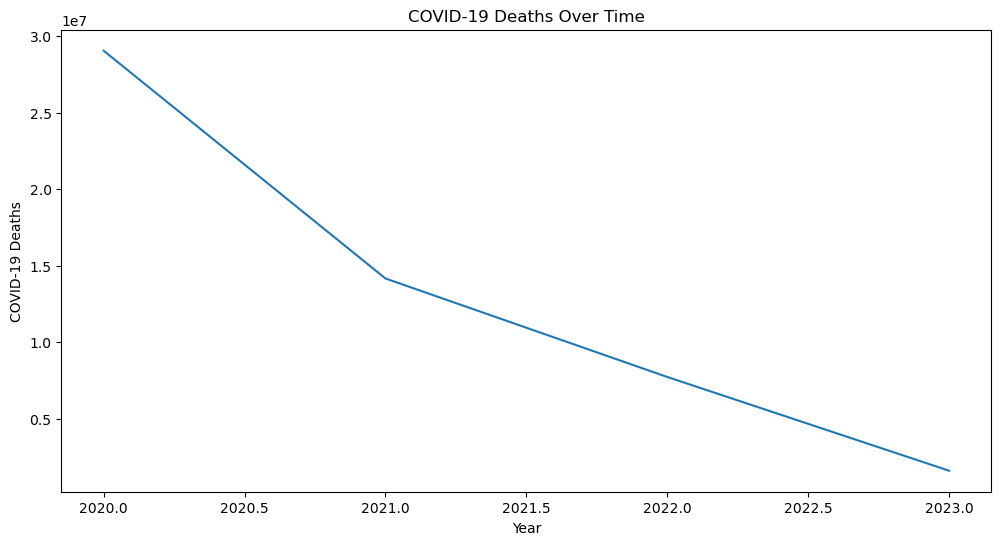

In [83]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='COVID-19 Deaths', data=df_grouped)
plt.title('COVID-19 Deaths Over Time')
plt.show()


COVID-19 Deaths by various health problems

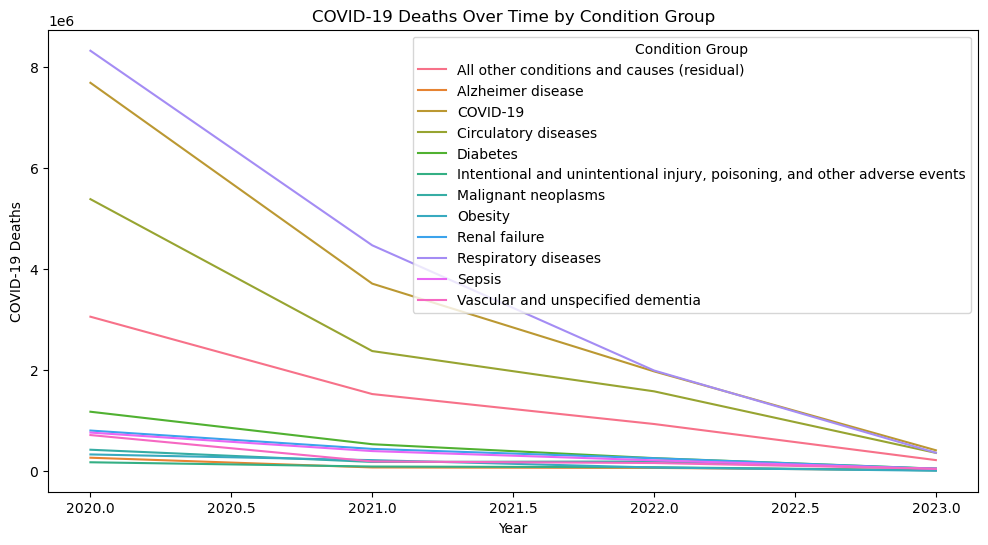

In [84]:
df_grouped_condition = df.groupby(['Year', 'Condition Group'])['COVID-19 Deaths'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='COVID-19 Deaths', hue='Condition Group', data=df_grouped_condition)
plt.title('COVID-19 Deaths Over Time by Condition Group')
plt.show()


HEATMAP

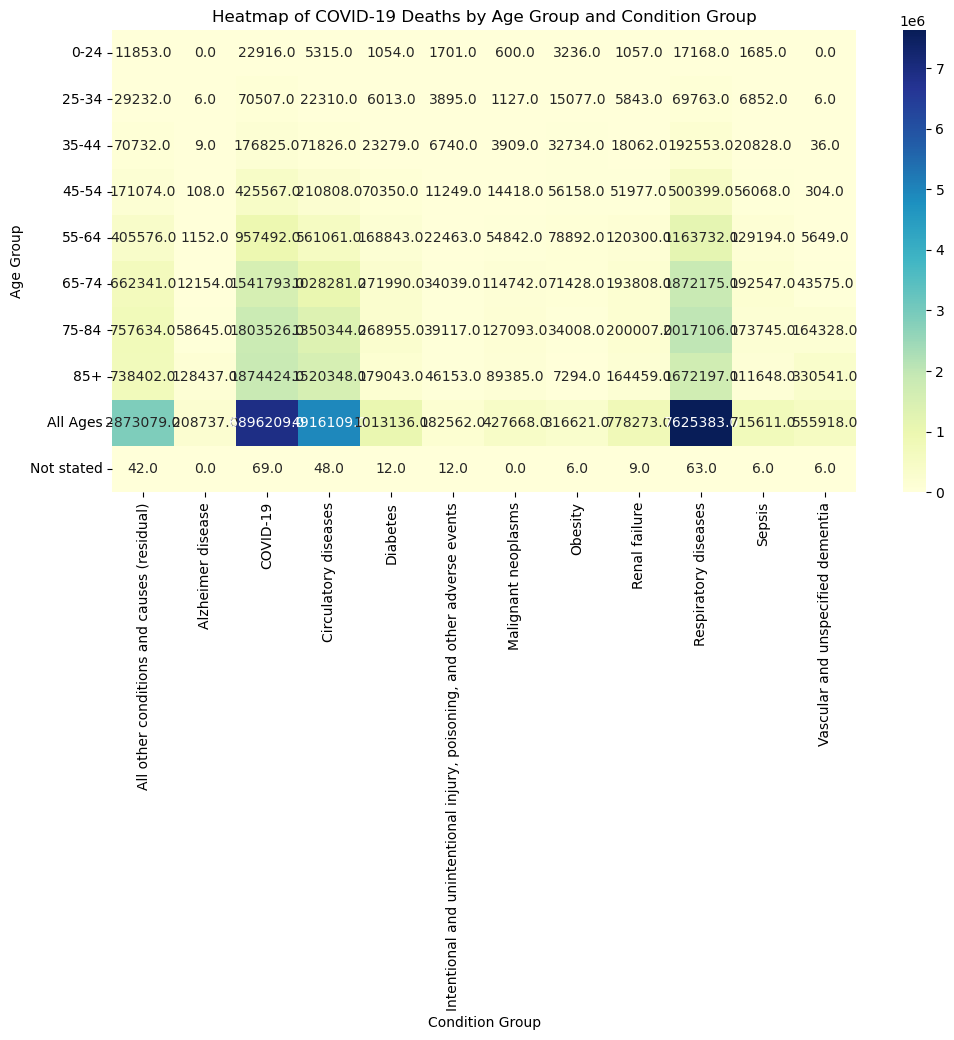

In [85]:
df_pivot = df.pivot_table(values='COVID-19 Deaths', index='Age Group', columns='Condition Group', aggfunc='sum')

plt.figure(figsize=(12, 6))
sns.heatmap(df_pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Heatmap of COVID-19 Deaths by Age Group and Condition Group')
plt.show()


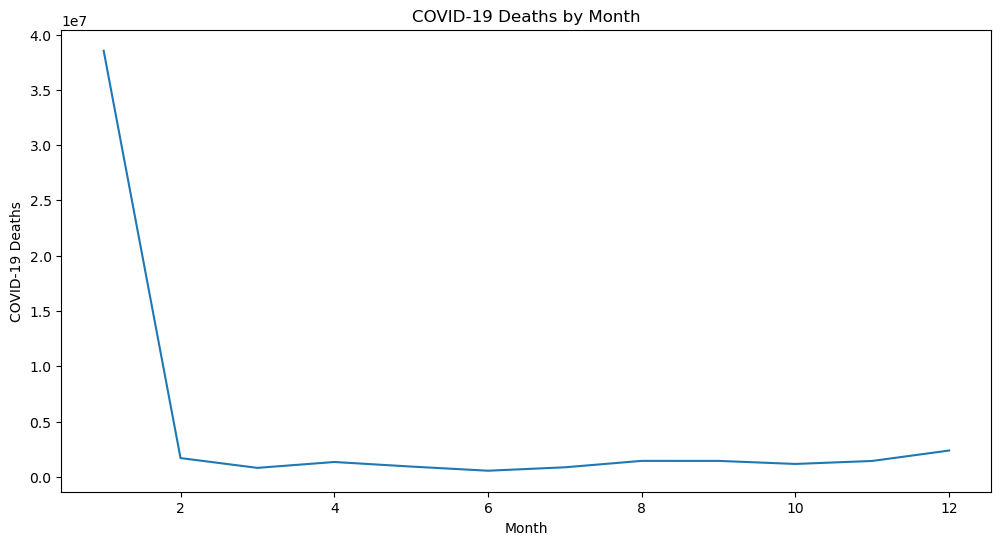

In [86]:
df['Month'] = df['Start Date'].dt.month
df_grouped_month = df.groupby('Month')['COVID-19 Deaths'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='COVID-19 Deaths', data=df_grouped_month)
plt.title('COVID-19 Deaths by Month')
plt.show()


In [87]:
def plotPerColumnDistribution(df, nGraphShown=10, nGraphPerRow=5):
    # Calculate number of unique values in each column
    nunique = df.nunique()
    
    # Select columns with unique values between 2 and 50 for visualization
    df = df[[col for col in df.columns if 1 < nunique[col] < 50]]
    
    nRow, nCol = df.shape
    columnNames = list(df.columns)
    
    # Calculate the number of rows needed for subplots
    nGraphRow = int(np.ceil(nCol / nGraphPerRow))
    
    # Create a figure for the subplots
    plt.figure(figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        
        # Check if the column data is categorical or numerical
        if not np.issubdtype(columnDf.dtype, np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist(bins=30)
        
        plt.ylabel('Counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    
    # Adjust layout
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()


C:\Users\krr_i\AppData\Local\Temp\ipykernel_24352\4026647547.py:34: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)


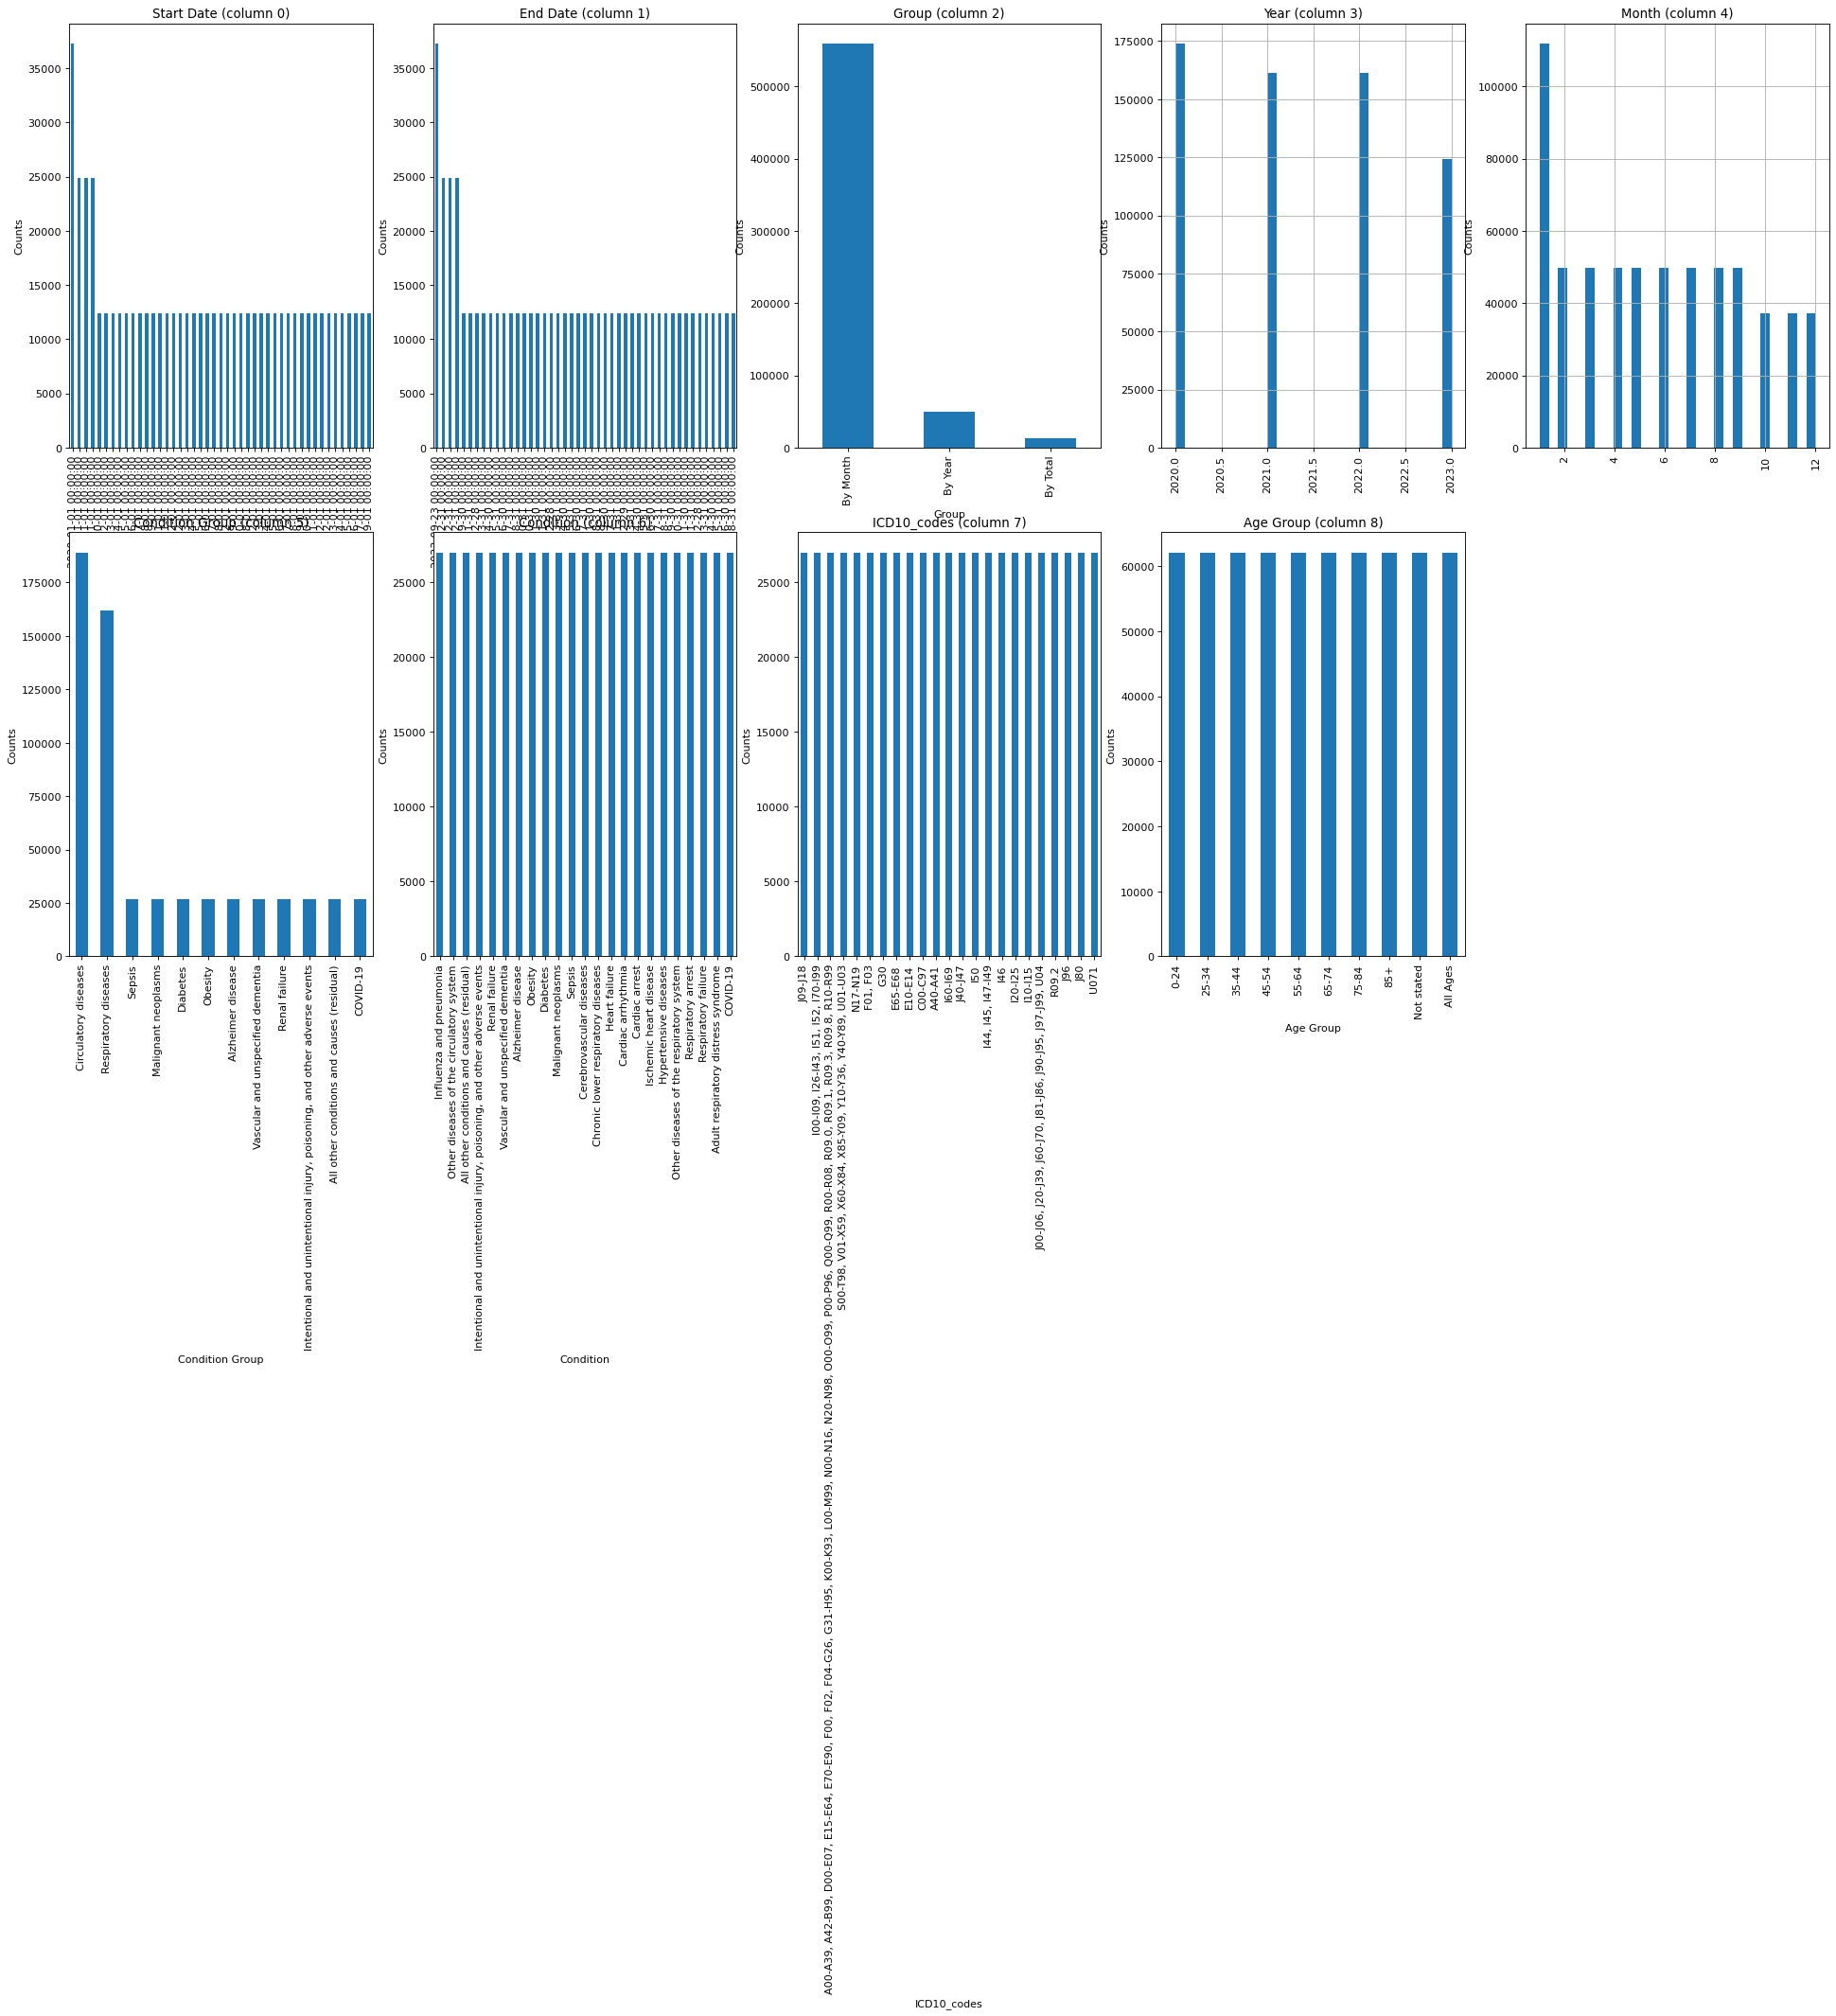

In [88]:
# Define the plotPerColumnDistribution() function
def plotPerColumnDistribution(df, nGraphShown=10, nGraphPerRow=5):
    # Calculate number of unique values in each column
    nunique = df.nunique()
    
    # Select columns with unique values between 2 and 50 for visualization
    df = df[[col for col in df.columns if 1 < nunique[col] < 50]]
    
    nRow, nCol = df.shape
    columnNames = list(df.columns)
    
    # Calculate the number of rows needed for subplots
    nGraphRow = int(np.ceil(nCol / nGraphPerRow))
    
    # Create a figure for the subplots
    plt.figure(figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        
        # Check if the column data is categorical or numerical
        if not np.issubdtype(columnDf.dtype, np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist(bins=30)
        
        plt.ylabel('Counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    
    # Adjust layout
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

# Call the plotPerColumnDistribution() function
plotPerColumnDistribution(df, 10, 5)

In [89]:
from pandas.plotting import scatter_matrix
def plotScatterMatrix(df, plotSize, textSize):
    # Keep only numerical columns
    df = df.select_dtypes(include=[np.number])
    # Drop columns with NaN values
    df = df.dropna(axis=1)
    # Keep columns with more than 1 unique value
    df = df[[col for col in df.columns if df[col].nunique() > 1]]
    columnNames = list(df.columns)
    # Reduce the number of columns if there are more than 10
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    # Create the scatter matrix
    ax = scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')   
    # Calculate the correlation matrix
    corrs = df.corr().values    
    # Annotate the correlation coefficients
    for i, j in zip(*np.triu_indices_from(corrs, k=1)):
        ax[i, j].annotate(f'Corr. coef = {corrs[i, j]:.3f}', (0.5, 0.1), xycoords='axes fraction', ha='center', va='center', size=textSize)  
    plt.suptitle('Scatter and Density Plot')
    plt.show()



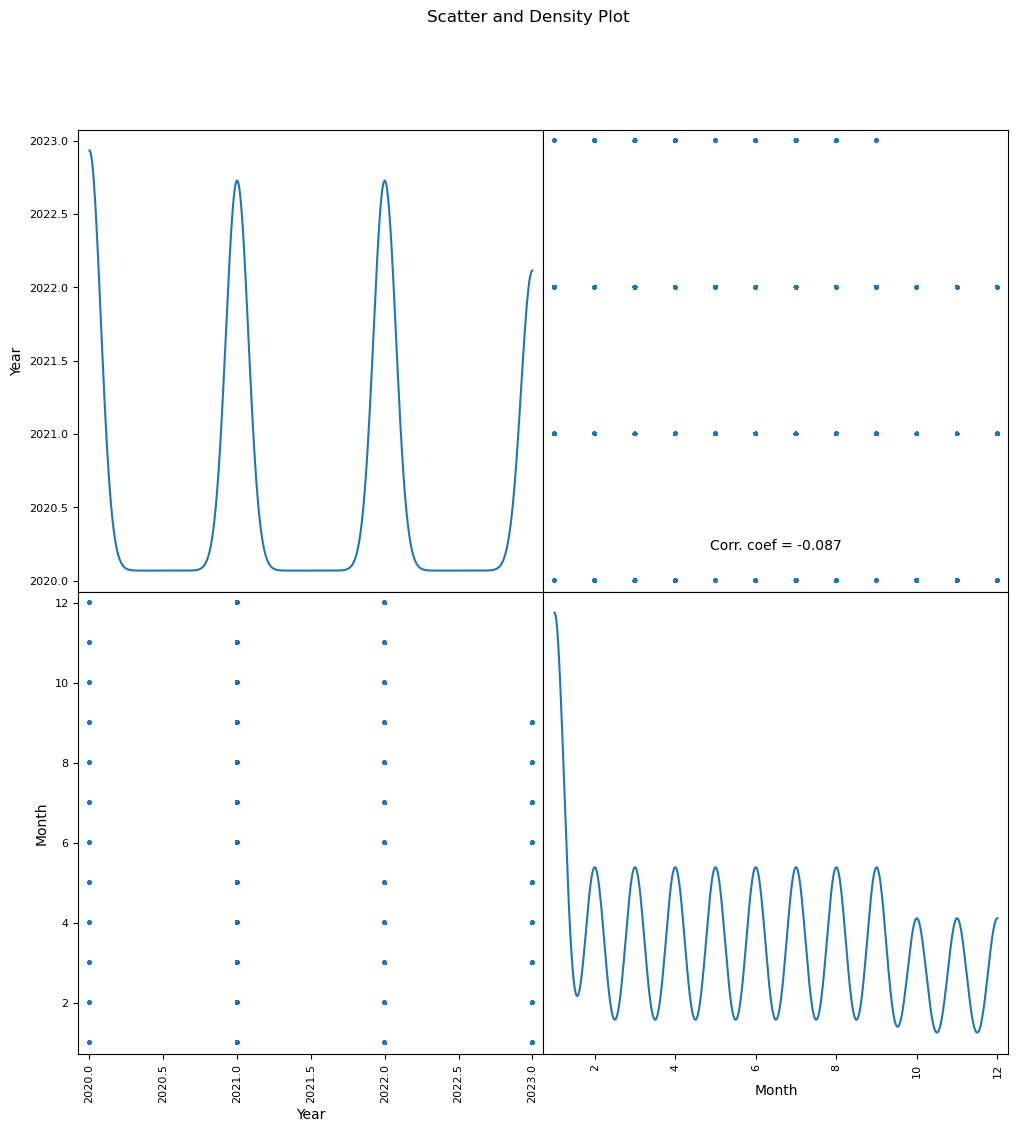

In [90]:
# Define the plotScatterMatrix() function
def plotScatterMatrix(df, plotSize, textSize):
    # Keep only numerical columns
    df = df.select_dtypes(include=[np.number])
    # Drop columns with NaN values
    df = df.dropna(axis=1)
    # Keep columns with more than 1 unique value
    df = df[[col for col in df.columns if df[col].nunique() > 1]]
    columnNames = list(df.columns)
    # Reduce the number of columns if there are more than 10
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    # Create the scatter matrix
    ax = scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')   
    # Calculate the correlation matrix
    corrs = df.corr().values    
    # Annotate the correlation coefficients
    for i, j in zip(*np.triu_indices_from(corrs, k=1)):
        ax[i, j].annotate(f'Corr. coef = {corrs[i, j]:.3f}', (0.5, 0.1), xycoords='axes fraction', ha='center', va='center', size=textSize)  
    plt.suptitle('Scatter and Density Plot')
    plt.show()

# Call the plotScatterMatrix() function
plotScatterMatrix(df, 12, 10)


In [91]:
from sklearn.metrics import confusion_matrix

# True labels
true_labels = [0, 1, 0, 1, 1, 0, 0, 1, 1, 0]

# Predicted labels
predicted_labels = [0, 1, 1, 1, 0, 0, 1, 0, 1, 1]

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2 3]
 [2 3]]


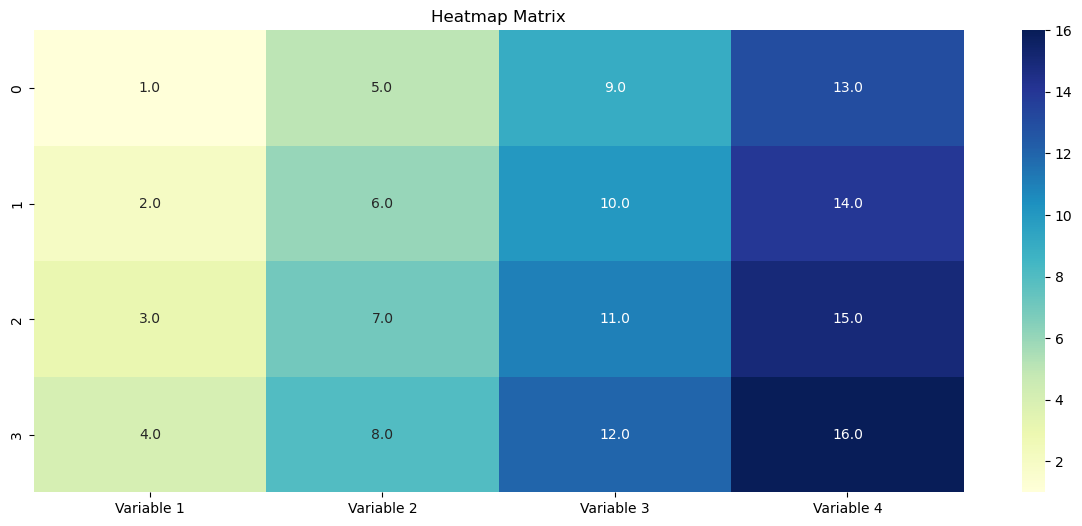

In [92]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a dataframe for the heatmap
heatmap_data = pd.DataFrame({'Variable 1': [1, 2, 3, 4],
                             'Variable 2': [5, 6, 7, 8],
                             'Variable 3': [9, 10, 11, 12],
                             'Variable 4': [13, 14, 15, 16]})

# Create the heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Heatmap Matrix')
plt.show()

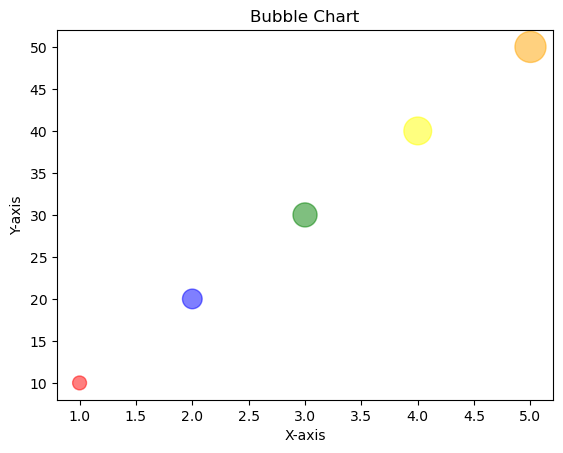

In [93]:
import matplotlib.pyplot as plt

# Data for the bubble chart
x = [1, 2, 3, 4, 5]  # x-coordinates
y = [10, 20, 30, 40, 50]  # y-coordinates
sizes = [100, 200, 300, 400, 500]  # sizes of bubbles
colors = ['red', 'blue', 'green', 'yellow', 'orange']  # colors of bubbles

# Create the bubble chart
plt.scatter(x, y, s=sizes, c=colors, alpha=0.5)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Bubble Chart')

# Show the chart
plt.show()

In [ ]:
# Grouping the data by condition, age group, and calculating statistics for COVID-19 deaths
statistics = df.groupby(['Condition', 'Age Group'])['COVID-19 Deaths'].agg(['count', 'mean', 'median', 'min', 'max', 'sum'])

# Displaying the statistics
print(statistics)


                                                count        mean  median  \
Condition                           Age Group                               
Adult respiratory distress syndrome 0-24         2263    0.902342     0.0   
                                    25-34        1988    4.586016     0.0   
                                    35-44        1794   14.429208     0.0   
                                    45-54        1720   38.298837     0.0   
                                    55-64        1660   80.959639     0.0   
...                                               ...         ...     ...   
Vascular and unspecified dementia   65-74        1385   31.462094     0.0   
                                    75-84        1473  111.560081    15.0   
                                    85+          1693  195.239811    24.0   
                                    All Ages     1933  287.593378    33.0   
                                    Not stated   2694    0.002227     0.0   